**Testing out features provided in SpaCy library**

In [ ]:
import spacy
import json

# load english language model
nlp = spacy.load('en_core_web_sm')

text = "This is a sample sentence."

# create spacy doc
doc = nlp(text)

pos_tags_dict = {}
# applying POS to each token
for token in doc:
    pos_tags_dict[token.text] = token.pos_

print(pos_tags_dict)

json_object = json.dumps(pos_tags_dict, indent = 4) 
print(json_object)

{'This': 'DET', 'is': 'AUX', 'a': 'DET', 'sample': 'NOUN', 'sentence': 'NOUN', '.': 'PUNCT'}
{
    "This": "DET",
    "is": "AUX",
    "a": "DET",
    "sample": "NOUN",
    "sentence": "NOUN",
    ".": "PUNCT"
}


In [ ]:
# from spacytextblob.spacytextblob import SpacyTextBlob
# nlp.add_pipe('spacytextblob')
# text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
# doc = nlp(text)
# doc._.blob.polarity                            
# doc._.blob.subjectivity                        
# doc._.blob.sentiment_assessments.assessments   
# doc._.blob.ngrams()    

In [ ]:
# filtering out tokens based on POS
for token in doc:
    # check token pos
    if token.pos_=='NOUN':
        # print token
        print(token.text)

sample
sentence


In [ ]:
text = "Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows"
# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

Great -> ADJ
work -> NOUN
vehicle -> NOUN
. -> PUNCT
Drives -> VERB
nice -> ADJ
. -> PUNCT
has -> AUX
lots -> NOUN
of -> ADP
room -> NOUN
. -> PUNCT
Easy -> ADJ
to -> PART
handle -> VERB
, -> PUNCT
bucket -> NOUN
seats -> NOUN
electric -> ADJ
windows -> NOUN


In [ ]:
!pip install visualise-spacy-tree

  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
# Dependency graph
from spacy import displacy 
displacy.render(doc, style='dep',jupyter=True)



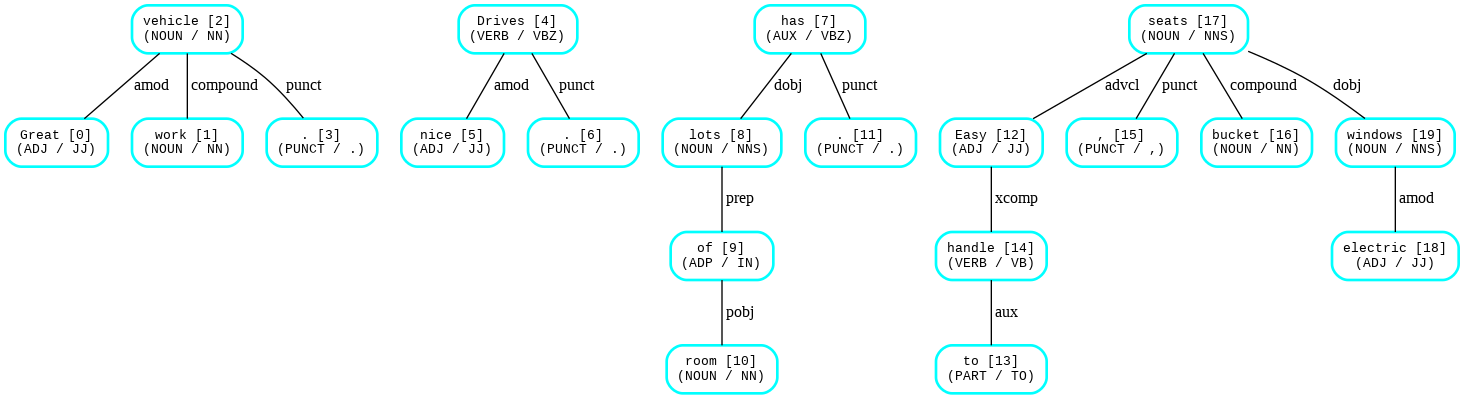

In [ ]:
from IPython.display import Image, display
import visualise_spacy_tree
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

In [ ]:
# Extracting subject and object
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print("Subject is : " + token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print("Object is : " + token.text)
        
        

Object is : lots
Object is : windows


In [ ]:
# pattern matching
from spacy.matcher import Matcher

sentences = ["the prime minister of India Indira Gandhi and PM Jawaharlal Nehru believed in working together in unity and with the principles of the UN",
 "Indira Gandhi believed in striking a balance between global production and consumption",
"PM Narendra Modi believes that economic empowerment and upliftment of any nation involves the empowerment of its women",
"PM Narendra Modi has launched several schemes that will help India achieve its SGD goals"]

# function to find sentences containing PMs of India
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'prime'},
              {'LOWER':'minister'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end 
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    for name in names:
        if (name.split()[2] == 'of') and (name.split()[3] != "India"):
                names.remove(name)
            
    return names

for sentence in sentences:
  if find_names(sentence):
    print(sentence)



the prime minister of India Indira Gandhi and PM Jawaharlal Nehru believed in working together in unity and with the principles of the UN


Text Summarization


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

def summarize(long_rev):
  summ = spacy.load('en')
  long_rev = summ(long_rev)
  print(f"Number of sentences : {len(list(long_rev.sents))}\n")

  keyword = []
  stopwords = list(STOP_WORDS)
  pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
  for token in long_rev:
      if(token.text in stopwords or token.text in punctuation):
          continue
      if(token.pos_ in pos_tag):
          keyword.append(token.text)
  freq_word = Counter(keyword)
  print("Filtering tokens \n")
  print(freq_word.most_common(5))

# Normalization
# Each sentence is weighed based on the 
# frequency of the token present in each sentence

  max_freq = Counter(keyword).most_common(1)[0][1]
  for word in freq_word.keys():  
          freq_word[word] = (freq_word[word]/max_freq)
  freq_word.most_common(5)

# Strength of sentences
  sent_strength={}
  for sent in long_rev.sents:
      for word in sent:
          if word.text in freq_word.keys():
              if sent in sent_strength.keys():
                  sent_strength[sent]+=freq_word[word.text]
              else:
                  sent_strength[sent]=freq_word[word.text]
  print("sentences with their respective strengths \n")
  print(sent_strength)

# the nlargest function returns a list containing the top 3 sentences which are stored as summarized_sentences

  summarized_sentences = nlargest(3, sent_strength, key=sent_strength.get)
  print("top 3 sentences with max strength ")
  print(summarized_sentences,"\n")

  print("Final Summarized Review ")
  final_sentences = [ w.text for w in summarized_sentences ]
  summary = ' '.join(final_sentences)
  print(summary)


In [ ]:
long_rev = "BMW has joined the facelift bandwagon with the X3. Being the third entry, it might have been a bit late to the party, behind the Audi Q5 facelift and the Volvo XC60 facelift, but it sure has come well prepared. \
  This mid-life update gives the X3 a much-needed shot in the arm to stay relevant in the hugely competitive ‘midsize luxury SUV’ segment.\
  The exterior design gets some noticeable changes that not only look modern and funky, but also help it stand out from the crowd. Starting at the front, you get a revamped face where the grille has grown in size. Now, in brushed metal and single-piece avatar, it still isn’t as polarising as the gigantic one on the X7, but it is a prominent part of the fascia. Look closer, and you will also notice the ‘active air stream’ that acts as a curtain inside the grille. \
  It opens and shuts depending on the engine temperature and helps with air flow, and reduces drag.\
  Then there are the adaptive LED headlamps that get ‘J-blades’ for the Daytime Running Lamps, like the ones on the facelifted BMW 5 series. \
  The headlamp housing is sleeker and sharper, and they look a lot more modern now. \
  On top-spec ‘M-sport’ trim (like the one seen here), it gets aggressive looking bumpers with plenty of angles and a contrasting piano black panel for the air dam, adding to the sporty appeal. \
  A special mention must be made to the lovely Brooklyn Grey paint shade that looks absolutely superb, especially in M-sport guise. For those who don’t mind being a bit bold, this is a shade worth a thought."
  
summarize(long_rev)

Number of sentences : 13

Filtering tokens 

[('facelift', 3), ('air', 3), ('BMW', 2), ('X3', 2), ('bit', 2)]
sentences with their respective strengths 

{BMW has joined the facelift bandwagon with the X3.: 3.0, Being the third entry, it might have been a bit late to the party, behind the Audi Q5 facelift and the Volvo XC60 facelift, but it sure has come well prepared.   : 5.333333333333333, This mid-life update gives the X3 a much-needed shot in the arm to stay relevant in the hugely competitive ‘midsize luxury SUV’ segment.  : 5.333333333333333, The exterior design gets some noticeable changes that not only look modern and funky, but also help it stand out from the crowd.: 4.666666666666666, Starting at the front, you get a revamped face where the grille has grown in size.: 2.333333333333333, Now, in brushed metal and single-piece avatar, it still isn’t as polarising as the gigantic one on the X7, but it is a prominent part of the fascia.: 3.3333333333333335, Look closer, and you wil

The Honda City is a well balanced car with an amazing engine to drive. It runs very smoothly and rarely breaks down
The -> det
Honda -> compound
City -> nsubj
is -> ROOT
a -> det
well -> advmod
balanced -> amod
car -> attr
with -> prep
an -> det
amazing -> amod
engine -> pobj
to -> aux
drive -> relcl
. -> punct
City , be balanced car amazing , engine
It -> nsubj
runs -> ROOT
very -> advmod
smoothly -> advmod
and -> cc
rarely -> advmod
breaks -> conj
down -> prt
It , run , 


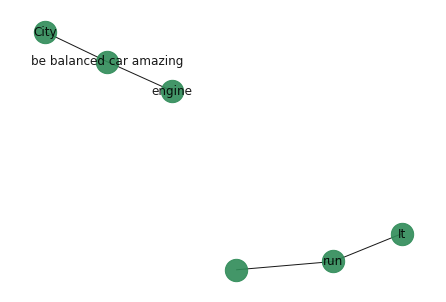

In [ ]:
# Implementing a knowledge graph to get a better understanding of subject and object relations
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

def knowledge_graph(text):
  sentences = getSentences(text)
  nlp_model = spacy.load('en_core_web_sm')
  triples = []
  print (text)
  for sentence in sentences:
      triples.append(processSentence(sentence))

  printGraph(triples)

text = "The Honda City is a well balanced car with an amazing engine to drive. It runs very smoothly and rarely breaks down"

knowledge_graph(text)

**Combining all Information Extraction operations into a function**

In [ ]:
from spacy.symbols import nsubj, VERB, ADJ

def IE_Operations(review):
  # create spacy doc
  doc = nlp(review)
  adjectives = set()
  verbs_all = set()
  # applying POS to each token
  print("POS Tagging : ")
  for token in doc:
      if token.pos_ not in ["SPACE", "DET", "ADP", "PUNCT", "AUX", "SCONJ", "CCONJ", "PART"]:
        print(token.text,'->',token.pos_)
      if(token.pos_=="ADJ"):
        adjectives.add(token.text)
      if(token.pos_=="VERB"):
        verbs_all.add(token.text)

  print("Dependency Graph : \n")

  print("************************************************************\n")
  displacy.render(doc, style='dep',jupyter=True)
  print("************************************************************\n")

  print("Verb with subject : \n")

  # Finding a verb with a subject
  verbs = set()
  for possible_subject in doc:
      if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
          verbs.add(possible_subject.head)
  print(verbs)
  print("************************************************************\n")

  print("Adjectives : \n")

  # Finding adjectives with a subject
  print(adjectives)
  print("************************************************************\n")
  # NER
  for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print("************************************************************\n")


  print("Knowledge Graph : \n")

  knowledge_graph(review)

  print("************************************************************\n")


  print("Summarization of review : ")
  summarize(review)

  print("************************************************************\n")


In [ ]:
# from spacy.symbols import nsubj, VERB, ADJ
# import eng_spacysentiment
# sentiment = eng_spacysentiment.load()
# review = "I hate chocolate"
# doc = sentiment(review)
# print(doc.cats)
# print("************************************************************\n")


**Working with a Dataset**
For the purpose of our investigation, we utilise the [Edmunds-Consumer Car Ratings and Reviews ](https://www.kaggle.com/ankkur13/edmundsconsumer-car-ratings-and-reviews)
 Dataset, containing consumer's thought and the star rating of car manufacturer/model/type for 62 popular brands

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download ankkur13/edmundsconsumer-car-ratings-and-reviews


 88% 44.0M/50.3M [00:00<00:00, 71.9MB/s]
100% 50.3M/50.3M [00:00<00:00, 79.6MB/s]


In [ ]:
! unzip edmundsconsumer-car-ratings-and-reviews.zip


Archive:  edmundsconsumer-car-ratings-and-reviews.zip
  inflating: Scraped_Car_Review_dodge.csv  
  inflating: Scraped_Car_Review_ferrari.csv  
  inflating: Scraped_Car_Review_fiat.csv  
  inflating: Scraped_Car_Review_ford.csv  
  inflating: Scraped_Car_Review_genesis.csv  
  inflating: Scraped_Car_Review_hummer.csv  
  inflating: Scraped_Car_Review_hyundai.csv  
  inflating: Scraped_Car_Review_infiniti.csv  
  inflating: Scraped_Car_Review_isuzu.csv  
  inflating: Scraped_Car_Review_jaguar.csv  
  inflating: Scraped_Car_Review_jeep.csv  
  inflating: Scraped_Car_Review_kia.csv  
  inflating: Scraped_Car_Review_lamborghini.csv  
  inflating: Scraped_Car_Review_land-rover.csv  
  inflating: Scraped_Car_Review_lexus.csv  
  inflating: Scraped_Car_Review_lincoln.csv  
  inflating: Scraped_Car_Review_lotus.csv  
  inflating: Scraped_Car_Review_maserati.csv  
  inflating: Scraped_Car_Review_maybach.csv  
  inflating: Scraped_Car_Review_mazda.csv  
  inflating: Scraped_Car_Review_mclaren.cs

In [ ]:
# function to preprocess speech
import re
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text


*For the purpose of testing, we chose one of the csv files that we extracted from the dataset*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Scraped_Car_Review_dodge.csv',delimiter=',', nrows = 100)
df.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875


In [ ]:
# preprocessing speeches
df['Review_clean'] = df['Review'].apply(clean)

In [ ]:
df.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_clean
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625,It been a great delivery vehicle for my cafe ...
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125,Bought this car as a commuter vehicle for a v...
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000,"This van rocks its the best, lots of \rroom. ..."
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500,Great work vehicle. Drives nice. has lots of ...
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875,Good solid frame and suspension. Well equipp...


*Examining dataset for keywords*


In [ ]:
df['Review_clean'][2]

' This van rocks its the best, lots of \rroom. I carry a lot of cargo in mine \rand i tow a lot too, it works great!'

In [ ]:
# postive words : great, amazing
# negative words : dissapointing, horrible, waste

In [ ]:
import numpy as np
reviews = df['Review_clean'][0:10]
reviews = np.array(reviews)
reviews[8]

' This is a left over new van. Great deal '

In [ ]:
# applying POS tagging to each review in the dataset and preparing dependency graph, knowledge graph
# and filtering out verbs and pronouns to apply sentiment analysis as well
for review in reviews:
  IE_Operations(review)

**Wrapping everything into a main function, taking in parameter of name of car brand.**

Operations performed 


1.   POS tagging
2.   Creating Dependency Graph
3.   Creating Knowledge Graph
4.   Filtering out verbs and adjectives to perform sentiment analysis
5.   Pattern matching to analyse customer review trends
6.   Named Entity Recognition
7. Text Summarization




In [ ]:
def IE_brand(brand):
  path = "/content/Scraped_Car_Review_" + brand + ".csv"
  df = pd.read_csv(path,delimiter=',', nrows = 100)
  df['Review_clean'] = df['Review'].apply(clean)
  df['Review_clean'][2]
  reviews = df['Review_clean'][0:5]
  reviews = np.array(reviews)
  df2 = df["Rating"].mean()
  print(f"Mean sentiment of users associated with the brand :{df2}/5")
  i=0
  for review in reviews:
    i=i+1
    print(f"For review num :{i} \n")
    IE_Operations(review)

Enter a card brand name : lotus
Mean sentiment of users associated with the brand :4.576807228915663/5
for review num :1 

POS Tagging : 
second -> ADJ
Lotus -> PROPN
first -> ADJ
05 -> NUM
Elise -> NOUN
190bhp -> NUM
soft -> ADJ
top -> NOUN
standard -> ADJ
suspension -> NOUN
new -> ADJ
S240 -> NOUN
could -> VERB
more -> ADV
different -> ADJ
car -> NOUN
Exige -> PROPN
serious -> ADJ
business -> NOUN
acceleration -> NOUN
spectacular -> ADJ
when -> ADV
you -> PRON
get -> VERB
throttle -> NOUN
supercharger -> ADJ
sounds -> VERB
jet -> NOUN
engine -> NOUN
you -> PRON
quickly -> ADV
become -> VERB
one -> NUM
driver -> NOUN
seat -> NOUN
I -> PRON
really -> ADV
enjoyed -> VERB
handling -> NOUN
cornering -> NOUN
Elise -> NOUN
Exige -> PROPN
Track -> PROPN
Pack -> PROPN
believed -> VERB
capability -> NOUN
car -> NOUN
corner -> VERB
hard -> ADV
minimal -> ADJ
body -> NOUN
roll -> NOUN
anything -> PRON
you -> PRON
experienced -> VERB
before -> ADV
Dependency Graph : 

****************************

************************************************************

Verb with subject : 

{sounds, experienced, get, enjoyed, become}
************************************************************

Adjectives : 

{'different', 'standard', 'supercharger', 'soft', 'serious', 'new', 'minimal', 'second', 'first', 'spectacular'}
************************************************************

second 12 18 ORDINAL
Lotus 19 24 ORG
first 29 34 ORDINAL
05 42 44 CARDINAL
190bhp 56 62 CARDINAL
S240 109 113 ORG
************************************************************

Knowledge Graph : 

 This is my second Lotus. My first was an 05 Elise with 190bhp, a soft top, and standard  suspension. My new S240 could not be a more different car. This Exige is serious business. The acceleration is spectacular; when you get on the throttle the supercharger sounds like a jet engine and you quickly become one with the driver seat. I really enjoyed the handling and cornering of the Elise, but the Exige S240 with the Trac

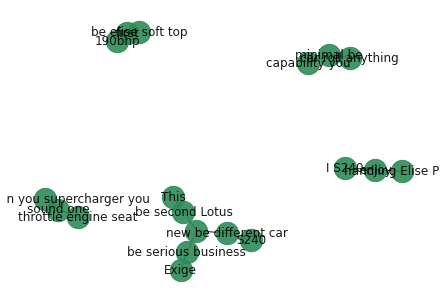

************************************************************

Summarization of review : 
Number of sentences : 7

Filtering tokens 

[('Elise', 2), ('car', 2), ('Exige', 2), ('second', 1), ('Lotus', 1)]
sentences with their respective strengths 

{ This is my second Lotus.: 1.0, My first was an 05 Elise with 190bhp, a soft top, and standard  suspension.: 2.5, My new S240 could not be a more different car.: 2.5, This Exige is serious business.: 1.5, The acceleration is spectacular; when you get on the throttle the supercharger sounds like a jet engine and you quickly become one with the driver seat.: 4.5, I really enjoyed the handling and cornering of the Elise, but the Exige S240 with the Track Pack is not to be believed.: 5.5, The capability of this car to corner hard with minimal body roll is unlike anything you have experienced before .: 4.0}
top 3 sentences with max strength 
[I really enjoyed the handling and cornering of the Elise, but the Exige S240 with the Track Pack is not to

************************************************************

Verb with subject : 

{bought, think, describe, put, count, thought, waited, wait, changed, improve, going}
************************************************************

Adjectives : 

{'bigger', 'hot', 'limited', 'much', 'glad', 'second', 'first', 'worth', 'better', 'outstanding'}
************************************************************

second 19 25 ORDINAL
07 97 99 DATE
240S 114 118 CARDINAL
US 123 125 GPE
08 137 139 DATE
4 342 343 CARDINAL
Lotus 403 408 ORG
07 463 465 DATE
first 485 490 ORDINAL
first 503 508 ORDINAL
SC 529 531 LOC
************************************************************

Knowledge Graph : 

 Well, this is the second Exige I've bought and for those that thought  the S version was hot in 07, this limited 240S for US release in 08 is just outstanding. I'll put this simply, this is the street version track car. Not much has changed overall, unless you count the interior is redone, has the launch capa

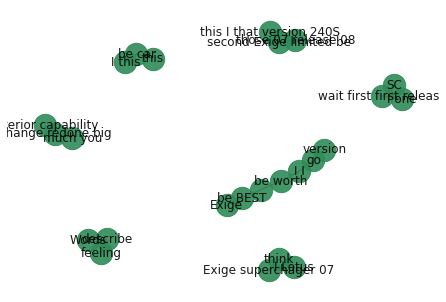

************************************************************

Summarization of review : 
Number of sentences : 10

Filtering tokens 

[('Exige', 3), ('version', 3), ('release', 2), ('track', 2), ('second', 1)]
sentences with their respective strengths 

{ Well, this is the second Exige I've bought and for those that thought  the S version was hot in 07, this limited 240S for US release in 08 is just outstanding.: 5.666666666666666, I'll put this simply, this is the street version track car.: 2.3333333333333335, Not much has changed overall, unless you count the interior is redone, has the launch capability, better, bigger brakes, 4 piston calipers and  a cupholder!: 4.0, Now, I didn't think that Lotus could improve the Exige, even with the superchager in 07.: 2.3333333333333335, I waited since my first one was the first release without the SC.: 1.3333333333333333, I was going to buy the track version, but heard that I should wait.: 3.0, I'm glad I did...: 0.3333333333333333, so worth i

************************************************************

Verb with subject : 

{researched, wrapped, bought, listen}
************************************************************

Adjectives : 

{'fantastic', 'great', 'upgraded', 'crazy', 'smooth', 'interior', 'comfortable', 'wonderful', 'raw', 'high', 'capable', 'spartan', 'worth', 'few'}
************************************************************

************************************************************

Knowledge Graph : 

 I researched this car for a while before I bought it. The car is fantastic to drive. The interior space is comfortable but yes it is somewhat spartan. However, it is a sport car and not a luxury car. The acceleration is crazy fast. The feel of the car while driving is like being part of the car itself. I have the upgraded stereo and the touring package so I can listen to great music and smell the wonderful scent of leather. Imagine a smooth ribbon of highway, the sun on your shoulder and your hands wrapp

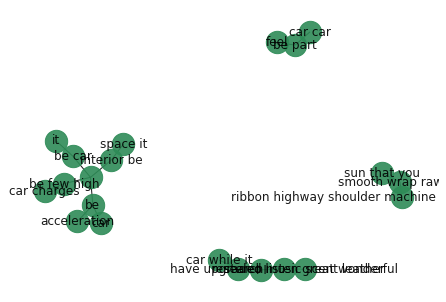

************************************************************

Summarization of review : 
Number of sentences : 11

Filtering tokens 

[('car', 7), ('worth', 2), ('researched', 1), ('bought', 1), ('fantastic', 1)]
sentences with their respective strengths 

{ I researched this car for a while before I bought it.: 1.2857142857142856, The car is fantastic to drive.: 1.2857142857142856, The interior space is comfortable but yes it is somewhat spartan.: 0.5714285714285714, However, it is a sport car and not a luxury car.: 2.2857142857142856, The acceleration is crazy fast.: 0.2857142857142857, The feel of the car while driving is like being part of the car itself.: 2.2857142857142856, I have the upgraded stereo and the touring package: 0.5714285714285714, so I can listen to great music and smell the wonderful scent of leather.: 0.9999999999999998, Imagine a smooth ribbon of highway, the sun on your shoulder and your hands wrapped around a machine that is capable of unleashing a fury of raw 

************************************************************

Verb with subject : 

{spells, flows, made, got, waited, take, want}
************************************************************

Adjectives : 

{'utilitarian', 'twisty', 'small', 'practical', 'pure', 'serious', 'back', 'glad', 'first', 'worth'}
************************************************************

utilitarian 53 64 NORP
one 112 115 CARDINAL
150 427 430 CARDINAL
US 539 541 GPE
2004 565 569 DATE
first 589 594 ORDINAL
US 595 597 GPE
Nov 2005 626 634 DATE
Feb 2006 649 657 DATE
Only 300 659 667 CARDINAL
************************************************************

Knowledge Graph : 

 Exige will take you're breath away. Not a practical utilitarian car by any means. This car car is designed for one purpose: to be driven on back twisty roads where the adrenaline flows through your veins. This is a me car that spells out individuality with F1 roots. This car is for serious drivers in a small niche track drivers, car enthus

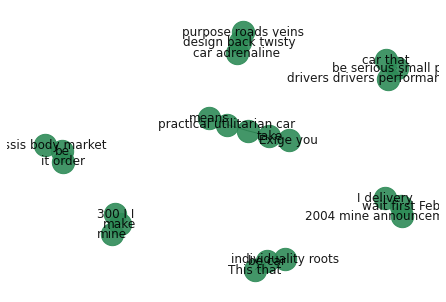

************************************************************

Summarization of review : 
Number of sentences : 9

Filtering tokens 

[('car', 6), ('drivers', 2), ('US', 2), ('Exige', 1), ('practical', 1)]
sentences with their respective strengths 

{ Exige will take you're breath away.: 0.16666666666666666, Not a practical utilitarian car by any means.: 1.5, This car car is designed for one purpose: to be driven on back twisty roads where the adrenaline flows through your veins.: 3.333333333333332, This is a me car that spells out individuality with F1 roots.: 1.666666666666667, This car is for serious drivers in a small niche track drivers, car enthusiasts and those that want pure performance without killing the pocket book.: 4.333333333333333, From its 150lb chassis to the hand layer fiber body it is definitely worth the wait for an order to be processed for the US market.: 2.1666666666666665, I waited since 2004 for mine since the first US announcement for ramp up in Nov 2005, deliv

************************************************************

Verb with subject : 

{comes, love, getting, draws, need, feel}
************************************************************

Adjectives : 

{'amazing', 'easier', 'little', 'beautiful', 'total', 'twisty', 'comfortable', 'functional', 'tricky', 'willing', 'phenomenal', 'prospective'}
************************************************************

4 337 338 CARDINAL
Commuting 414 423 ORG
Ingress 574 581 ORG
************************************************************

Knowledge Graph : 

 The Exige is an amazing machine.  Steering feel, braking & cornering are all phenomenal.  The car is also beautiful to look at while being functional.  I love mine, but prospective buyers need to know what they're getting.  The car is not for everyone and you have to be willing to deal with its total impracticalities.  It basically a 4 wheel motorcycle.  The car is best used on twisty back roads or on track.  Commuting or highway cruising is a 

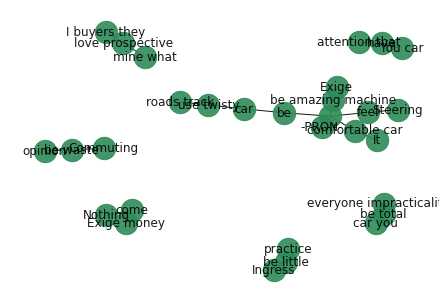

************************************************************

Summarization of review : 
Number of sentences : 13

Filtering tokens 

[('car', 5), ('Exige', 2), ('amazing', 1), ('machine', 1), ('Steering', 1)]
sentences with their respective strengths 

{ The Exige is an amazing machine.  : 0.8, Steering feel, braking & cornering are all phenomenal.  : 1.0, The car is also beautiful to look at while being functional.  : 1.5999999999999999, I love mine, but prospective buyers need to know what they're getting.  : 1.2, The car is not for everyone and you have to be willing to deal with its total impracticalities.  : 1.7999999999999998, basically a 4 wheel motorcycle.  : 0.4, The car is best used on twisty back roads or on track.  : 1.5999999999999999, Commuting or highway cruising is a waste, in my opinion.  : 1.0, You have to accept the attention that the car draws.  : 1.5999999999999999, It a surprisingly comfortable car once inside.  : 1.2, Ingress and egress are tricky but get easier

In [ ]:
brand = input('Enter a card brand name : ')
IE_brand(brand)

**Future Improvement :**

- [x] Create REST API out of NLP model and integrate with frontend

-  Collect latest data from tweets
- perform real time sentiment analysis
- Output a full report on a brand based on IE techniques







In [ ]:
# Extracting tweets from twitter and saving into csv file
import tweepy
from tweepy import API, Cursor, OAuthHandler
import pandas as pd
import csv
import re 
import string
import preprocessor as p
import os

def extract_tweets(search_words):
    
    consumer_key = os.getenv['consumer_key']
    consumer_secret = os.getenv['consumer_secret']
    access_key= os.getenv['access_key']
    access_secret = os.getenv['access_secret']
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth,wait_on_rate_limit=True)

    csvFile = open('./data/tweets.csv', 'a')
    csvWriter = csv.writer(csvFile)
    
    search_words = search_words    # enter your words
    new_search = search_words + " -filter:retweets"
    
    for tweet in tweepy.Cursor(api.search_tweets,q=new_search,count=10,
                            lang="en",
                            since_id=0).items():
        csvWriter.writerow([tweet.created_at, 
        tweet.text.encode('utf-8'),
        tweet.user.screen_name.encode('utf-8'), 
        tweet.user.location.encode('utf-8')])



**Downloading API from github**